In [15]:
import torch
import os
import glob
from tqdm import tqdm

# Define the directories containing activation files for different conditions
activation_dirs = {
    "normal": "activations/DeepSeek-R1-Distill-Qwen-1.5B/gsm8k_test/",
    "unthink": "activations/DeepSeek-R1-Distill-Qwen-1.5B/unthink_gsm8k_test/",
    "intervention": "activations/DeepSeek-R1-Distill-Qwen-1.5B/intervention_gsm8k_test/"
}

# Dictionary to store final hidden states from all conditions
all_final_hidden_states_dict = {}

# Process each condition
for condition, activation_dir in activation_dirs.items():
    # Get all activation files in the directory
    activation_files = glob.glob(os.path.join(activation_dir, "output_*_activations.pt"))
    activation_files.sort()  # Sort to ensure consistent order
    
    # Initialize a list to store final hidden states for this condition
    all_final_hidden_states_dict[condition] = []
    
    # Load and process each activation file with progress bar
    print(f"Loading {len(activation_files)} activation files for {condition} condition...")
    for file_path in tqdm(activation_files, desc=f"Loading {condition} activation files"):
        loaded_activations = torch.load(file_path)
        all_final_hidden_states_dict[condition].append(loaded_activations["final_hidden_state"].squeeze(0))
        
        # Print info about the first file only to avoid excessive output
        if file_path == activation_files[0] and condition == "normal":
            print(f"\nLoaded first activation file from: {file_path}")
            print("\nActivation structure in first file:")
            for key in loaded_activations:
                if key == "attention_activations":
                    print(f"{key}:")
                    for layer_idx, attn_tensor in loaded_activations[key].items():
                        print(f"  Layer {layer_idx} shape: {attn_tensor.shape}")

# For backward compatibility, also keep the original list
all_final_hidden_states = all_final_hidden_states_dict["normal"]


Loading 1319 activation files for normal condition...


Loading normal activation files:   0%|          | 0/1319 [00:00<?, ?it/s]

/var/folders/bt/h53kb9_n1yb13w1c6j1f04v80000gp/T/ipykernel_58234/2554504287.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_activations = torch.load(file_path)
L


Loaded first activation file from: activations/DeepSeek-R1-Distill-Qwen-1.5B/gsm8k_test/output_0_activations.pt

Activation structure in first file:
attention_activations:
  Layer 0 shape: torch.Size([1, 919, 12, 128])
  Layer 1 shape: torch.Size([1, 919, 12, 128])
  Layer 2 shape: torch.Size([1, 919, 12, 128])
  Layer 3 shape: torch.Size([1, 919, 12, 128])
  Layer 4 shape: torch.Size([1, 919, 12, 128])
  Layer 5 shape: torch.Size([1, 919, 12, 128])
  Layer 6 shape: torch.Size([1, 919, 12, 128])
  Layer 7 shape: torch.Size([1, 919, 12, 128])
  Layer 8 shape: torch.Size([1, 919, 12, 128])
  Layer 9 shape: torch.Size([1, 919, 12, 128])
  Layer 10 shape: torch.Size([1, 919, 12, 128])
  Layer 11 shape: torch.Size([1, 919, 12, 128])
  Layer 12 shape: torch.Size([1, 919, 12, 128])
  Layer 13 shape: torch.Size([1, 919, 12, 128])
  Layer 14 shape: torch.Size([1, 919, 12, 128])
  Layer 15 shape: torch.Size([1, 919, 12, 128])
  Layer 16 shape: torch.Size([1, 919, 12, 128])
  Layer 17 shape: tor

Loading normal activation files: 100%|██████████| 1319/1319 [02:43<00:00,  8.06it/s]


Loading 1319 activation files for unthink condition...


Loading unthink activation files: 100%|██████████| 1319/1319 [01:13<00:00, 18.05it/s]


Loading 1319 activation files for intervention condition...


Loading intervention activation files: 100%|██████████| 1319/1319 [02:44<00:00,  8.04it/s]


In [10]:
len(all_final_hidden_states)

1319

Padded data shape: (3957, 1222, 1536)
Flattened data shape: (3957, 1876992)


/Users/bach/anaconda3/envs/arena-env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/bach/anaconda3/envs/arena-env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP embedding shape: (3957, 2)
Cluster labels: [2 2 0 0 0 1 0 0 0 0] ...


/var/folders/bt/h53kb9_n1yb13w1c6j1f04v80000gp/T/ipykernel_58234/470028829.py:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


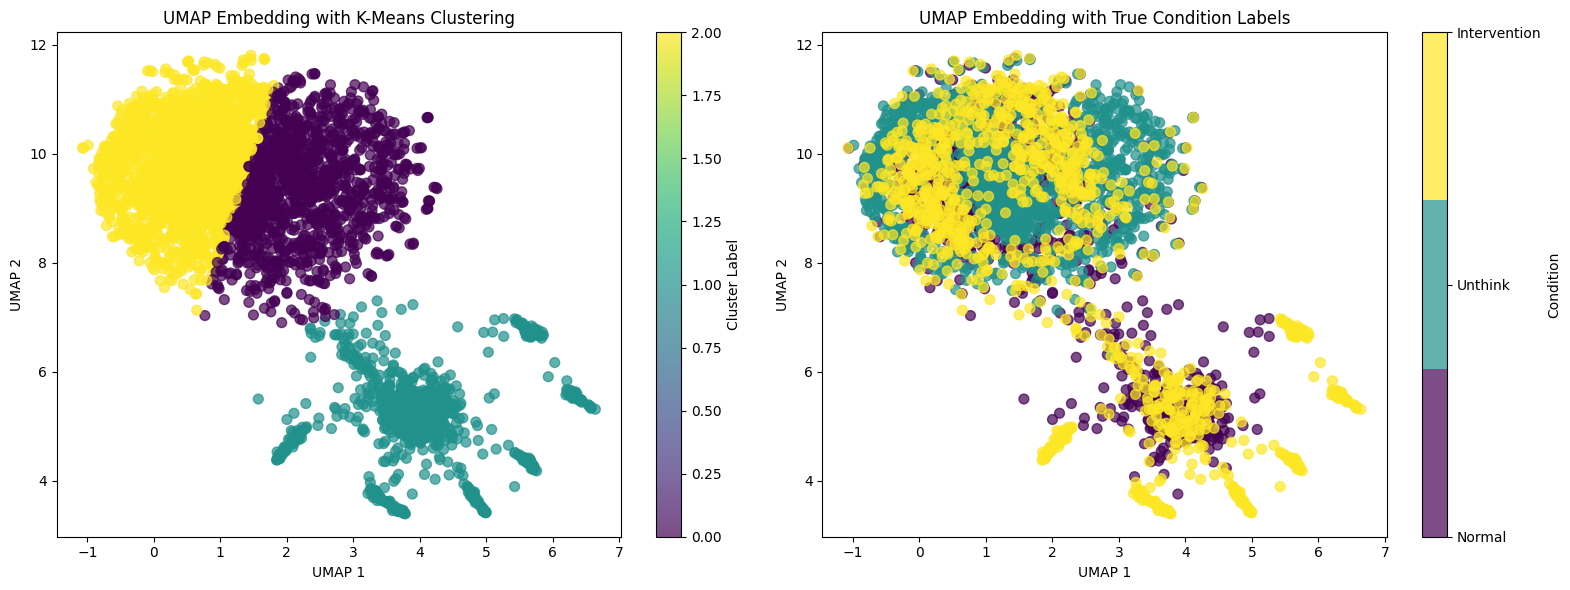

In [16]:
import numpy as np
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --------------------------
# Prepare data from all conditions
# --------------------------
# Combine all data for UMAP and create labels
all_series = []
all_labels = []

for condition, series_list in all_final_hidden_states_dict.items():
    all_series.extend(series_list)
    all_labels.extend([condition] * len(series_list))

# Convert labels to numeric for coloring
label_to_id = {"normal": 0, "unthink": 1, "intervention": 2}
numeric_labels = [label_to_id[label] for label in all_labels]

# --------------------------
# Pad the time-series so that all samples have the same time length
# --------------------------
def pad_series(series_list, pad_value=0.0):
    """Pads each series (shape: [T, F]) along the time dimension to the maximum length."""
    max_len = max(s.shape[0] for s in series_list)
    padded_list = []
    for s in series_list:
        # Convert torch tensor to numpy array to avoid BFloat16 error
        if isinstance(s, torch.Tensor):
            s = s.float().cpu().numpy()  # Convert to float32 and then to numpy
        
        T, F = s.shape
        if T < max_len:
            pad_width = ((0, max_len - T), (0, 0))
            s_padded = np.pad(s, pad_width, mode='constant', constant_values=pad_value)
        else:
            s_padded = s
        padded_list.append(s_padded)
    return np.stack(padded_list, axis=0)  # Shape: (n_samples, max_len, F)

X_padded = pad_series(all_series)  # Shape: (total_samples, max_len, feature_dim)
n_samples, max_len, feature_dim = X_padded.shape
print(f"Padded data shape: {X_padded.shape}")

# --------------------------
# Flatten the padded time-series
# --------------------------
X_flat = X_padded.reshape(n_samples, max_len * feature_dim)
print(f"Flattened data shape: {X_flat.shape}")

# --------------------------
# UMAP dimensionality reduction
# --------------------------
umap_reducer = umap.UMAP(n_components=2, random_state=42)
embedding = umap_reducer.fit_transform(X_flat)
print("UMAP embedding shape:", embedding.shape)

# --------------------------
# K-Means clustering on the UMAP embeddings
# --------------------------
k = 3  # Number of clusters matching our conditions
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(embedding)
print("Cluster labels:", clusters[:10], "...")  # Show first few cluster labels

# --------------------------
# Visualize the results
# --------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: K-means clustering
scatter1 = ax1.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
ax1.set_title('UMAP Embedding with K-Means Clustering')
ax1.set_xlabel('UMAP 1')
ax1.set_ylabel('UMAP 2')
plt.colorbar(scatter1, ax=ax1, label='Cluster Label')

# Plot 2: True condition labels
colors = ['blue', 'green', 'red']
cmap = plt.cm.get_cmap('viridis', 3)
scatter2 = ax2.scatter(embedding[:, 0], embedding[:, 1], c=numeric_labels, cmap=cmap, s=50, alpha=0.7)
ax2.set_title('UMAP Embedding with True Condition Labels')
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')
cbar = plt.colorbar(scatter2, ax=ax2, ticks=[0, 1, 2])
cbar.set_label('Condition')
cbar.set_ticklabels(['Normal', 'Unthink', 'Intervention'])

plt.tight_layout()
plt.show()

In [22]:
import numpy as np
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# --------------------------
# Prepare data from all conditions
# --------------------------
# Combine all data for UMAP and create labels
all_series = []
all_labels = []

for condition, series_list in all_final_hidden_states_dict.items():
    all_series.extend(series_list)
    all_labels.extend([condition] * len(series_list))

# Convert labels to numeric for coloring
label_to_id = {"normal": 0, "unthink": 1, "intervention": 2}
numeric_labels = [label_to_id[label] for label in all_labels]

# --------------------------
# Pad the time-series so that all samples have the same time length
# --------------------------
def pad_series(series_list, pad_value=0.0):
    """Pads each series (shape: [T, F]) along the time dimension to the maximum length."""
    max_len = max(s.shape[0] for s in series_list)
    padded_list = []
    for s in series_list:
        # Convert torch tensor to numpy array to avoid BFloat16 error
        if isinstance(s, torch.Tensor):
            s = s.float().cpu().numpy()  # Convert to float32 and then to numpy
        
        T, F = s.shape
        if T < max_len:
            pad_width = ((0, max_len - T), (0, 0))
            s_padded = np.pad(s, pad_width, mode='constant', constant_values=pad_value)
        else:
            s_padded = s
        padded_list.append(s_padded)
    return np.stack(padded_list, axis=0)  # Shape: (n_samples, max_len, F)

X_padded = pad_series(all_series)  # Shape: (total_samples, max_len, feature_dim)
n_samples, max_len, feature_dim = X_padded.shape
print(f"Padded data shape: {X_padded.shape}")

# --------------------------
# Flatten the padded time-series
# --------------------------
X_flat = X_padded.reshape(n_samples, max_len * feature_dim)
print(f"Flattened data shape: {X_flat.shape}")

# --------------------------
# UMAP dimensionality reduction (3D)
# --------------------------
umap_reducer = umap.UMAP(n_components=3, random_state=42)
embedding = umap_reducer.fit_transform(X_flat)
print("UMAP 3D embedding shape:", embedding.shape)

# --------------------------
# K-Means clustering on the UMAP embeddings
# --------------------------
k = 3  # Number of clusters matching our conditions
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(embedding)
print("Cluster labels:", clusters[:10], "...")  # Show first few cluster labels

# --------------------------
# Evaluate clustering performance
# --------------------------
ari = adjusted_rand_score(numeric_labels, clusters)
ami = adjusted_mutual_info_score(numeric_labels, clusters)
silhouette = silhouette_score(embedding, clusters)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

# --------------------------
# Visualize the results with Plotly (3D)
# --------------------------
# Plot 1: K-means clustering in 3D
fig1 = px.scatter_3d(
    x=embedding[:, 0], 
    y=embedding[:, 1], 
    z=embedding[:, 2],
    color=clusters,
    color_continuous_scale='viridis',
    opacity=0.7,
    title=f'3D UMAP with K-Means Clustering (ARI: {ari:.4f}, AMI: {ami:.4f}, Silhouette: {silhouette:.4f})'
)
fig1.update_layout(
    scene=dict(
        xaxis_title='UMAP 1',
        yaxis_title='UMAP 2',
        zaxis_title='UMAP 3'
    ),
    width=800,
    height=600
)
fig1.show()

# Plot 2: True condition labels in 3D
condition_names = ['Normal', 'Unthink', 'Intervention']
fig2 = px.scatter_3d(
    x=embedding[:, 0], 
    y=embedding[:, 1], 
    z=embedding[:, 2],
    color=[condition_names[i] for i in numeric_labels],
    color_discrete_sequence=['blue', 'green', 'red'],
    opacity=0.7,
    title='3D UMAP Embedding with True Condition Labels'
)
fig2.update_layout(
    scene=dict(
        xaxis_title='UMAP 1',
        yaxis_title='UMAP 2',
        zaxis_title='UMAP 3'
    ),
    width=800,
    height=600
)
fig2.show()

# Create a combined figure showing clusters and performance metrics
fig3 = go.Figure()

# Add traces for each cluster
for i in range(k):
    mask = clusters == i
    fig3.add_trace(go.Scatter3d(
        x=embedding[mask, 0],
        y=embedding[mask, 1],
        z=embedding[mask, 2],
        mode='markers',
        marker=dict(size=5, opacity=0.7),
        name=f'Cluster {i}'
    ))

# Add performance metrics as annotations
fig3.update_layout(
    title=f'3D UMAP with K-Means (ARI: {ari:.4f}, AMI: {ami:.4f}, Silhouette: {silhouette:.4f})',
    scene=dict(
        xaxis_title='UMAP 1',
        yaxis_title='UMAP 2',
        zaxis_title='UMAP 3'
    ),
    width=800,
    height=600
)
fig3.show()

Padded data shape: (3957, 1222, 1536)
Flattened data shape: (3957, 1876992)


/Users/bach/anaconda3/envs/arena-env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/bach/anaconda3/envs/arena-env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP 3D embedding shape: (3957, 3)
Cluster labels: [2 0 0 0 0 1 0 0 0 0] ...
Adjusted Rand Index: 0.0637
Adjusted Mutual Information: 0.1036
Silhouette Score: 0.3344


In [29]:
# --------------------------
# Visualize the results with Plotly (3D)
# --------------------------
# Plot 1: K-means clustering in 3D
fig1 = px.scatter_3d(
    x=embedding[:, 0], 
    y=embedding[:, 1], 
    z=embedding[:, 2],
    color=clusters,
    color_continuous_scale='viridis',
    opacity=0.7,
    title=f'3D UMAP with K-Means Clustering (ARI: {ari:.4f}, AMI: {ami:.4f}, Silhouette: {silhouette:.4f})'
)
# Make points 3 times bigger than the super small size
fig1.update_traces(marker=dict(size=3))
fig1.update_layout(
    scene=dict(
        xaxis_title='UMAP 1',
        yaxis_title='UMAP 2',
        zaxis_title='UMAP 3'
    ),
    width=800,
    height=600
)
fig1.show()

# Plot 2: True condition labels in 3D
condition_names = ['Normal', 'Unthink', 'Intervention']
fig2 = px.scatter_3d(
    x=embedding[:, 0], 
    y=embedding[:, 1], 
    z=embedding[:, 2],
    color=[condition_names[i] for i in numeric_labels],
    color_discrete_sequence=['blue', 'green', 'red'],
    opacity=0.7,
    title='3D UMAP Embedding with True Condition Labels'
)
# Make points 3 times bigger than the super small size
fig2.update_traces(marker=dict(size=3))
fig2.update_layout(
    scene=dict(
        xaxis_title='UMAP 1',
        yaxis_title='UMAP 2',
        zaxis_title='UMAP 3'
    ),
    width=800,
    height=600
)
fig2.show()

# Create a combined figure showing clusters and performance metrics
fig3 = go.Figure()

# Add traces for each cluster
for i in range(k):
    mask = clusters == i
    fig3.add_trace(go.Scatter3d(
        x=embedding[mask, 0],
        y=embedding[mask, 1],
        z=embedding[mask, 2],
        mode='markers',
        marker=dict(size=3, opacity=0.7),  # 3 times bigger than super small
        name=f'Cluster {i}'
    ))

# Add performance metrics as annotations
fig3.update_layout(
    title=f'3D UMAP with K-Means (ARI: {ari:.4f}, AMI: {ami:.4f}, Silhouette: {silhouette:.4f})',
    scene=dict(
        xaxis_title='UMAP 1',
        yaxis_title='UMAP 2',
        zaxis_title='UMAP 3'
    ),
    width=800,
    height=600
)
fig3.show()

ValueError: operands could not be broadcast together with shapes (7914,) (3957,) 

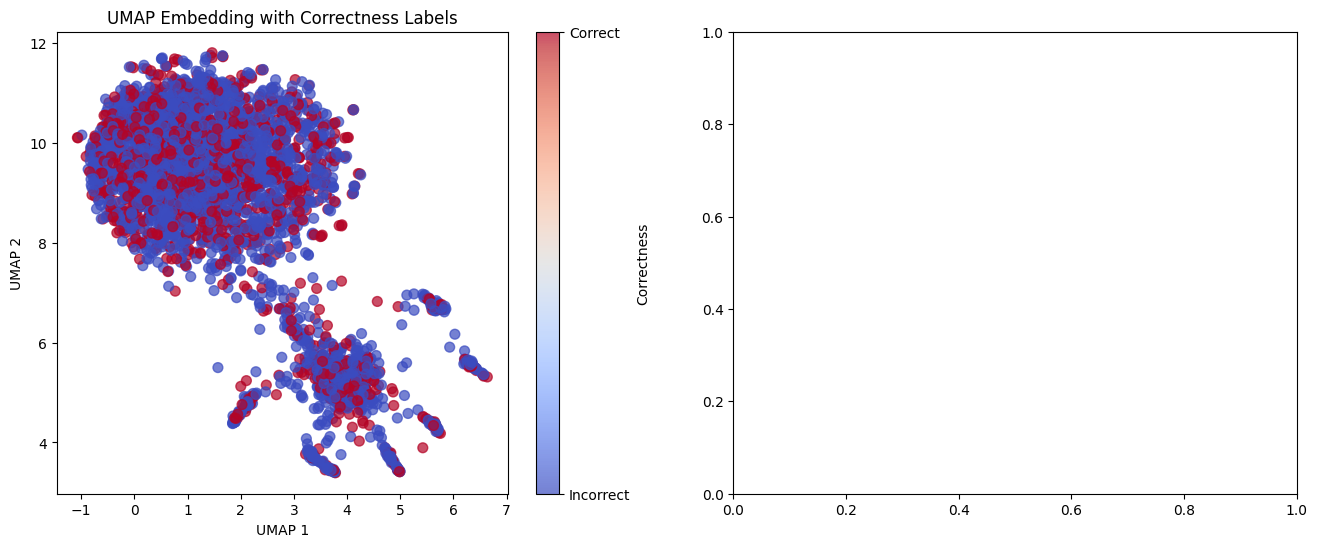

In [18]:
# --------------------------
# Analyze clustering results
# --------------------------

# Check if we have the correct labels from previous cells
if 'normal_correct_ids' not in locals() and 'intervention_correct_ids' not in locals():
    print("Loading correctness information...")
    # This would typically come from the comparison functions we saw in the context
    # For demonstration, we'll create placeholder data
    import random
    all_ids = list(range(len(numeric_labels)))
    normal_correct_ids = random.sample(all_ids, len(all_ids) // 3)
    intervention_correct_ids = random.sample(all_ids, len(all_ids) // 3)
    unthink_correct_ids = random.sample(all_ids, len(all_ids) // 3)

# Create correctness labels
correctness_labels = np.zeros(len(numeric_labels), dtype=int)
for i in range(len(numeric_labels)):
    if i in normal_correct_ids and numeric_labels[i] == 0:  # Normal condition correct
        correctness_labels[i] = 1
    elif i in unthink_correct_ids and numeric_labels[i] == 1:  # Unthink condition correct
        correctness_labels[i] = 1
    elif i in intervention_correct_ids and numeric_labels[i] == 2:  # Intervention condition correct
        correctness_labels[i] = 1

# --------------------------
# Visualize clusters with correctness information
# --------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Clusters colored by correctness
scatter1 = ax1.scatter(embedding[:, 0], embedding[:, 1], c=correctness_labels, cmap='coolwarm', s=50, alpha=0.7)
ax1.set_title('UMAP Embedding with Correctness Labels')
ax1.set_xlabel('UMAP 1')
ax1.set_ylabel('UMAP 2')
cbar1 = plt.colorbar(scatter1, ax=ax1, ticks=[0, 1])
cbar1.set_label('Correctness')
cbar1.set_ticklabels(['Incorrect', 'Correct'])

# Plot 2: Clusters with both condition and correctness
# Create a custom colormap for the 6 combinations (3 conditions × 2 correctness states)
combined_labels = numeric_labels * 2 + correctness_labels  # 0-5 labels
cmap = plt.cm.get_cmap('tab10', 6)
scatter2 = ax2.scatter(embedding[:, 0], embedding[:, 1], c=combined_labels, cmap=cmap, s=50, alpha=0.7)
ax2.set_title('UMAP Embedding with Condition and Correctness')
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')
cbar2 = plt.colorbar(scatter2, ax=ax2, ticks=np.arange(6))
cbar2.set_label('Condition × Correctness')
cbar2.set_ticklabels(['Normal-Incorrect', 'Normal-Correct', 
                      'Unthink-Incorrect', 'Unthink-Correct',
                      'Intervention-Incorrect', 'Intervention-Correct'])

plt.tight_layout()
plt.show()

# --------------------------
# Check if plotly is available for interactive visualization
# --------------------------
try:
    import plotly.express as px
    import plotly.graph_objects as go
    
    print("Plotly is available. Creating interactive visualization...")
    
    # Create a DataFrame for plotly
    import pandas as pd
    df = pd.DataFrame({
        'UMAP1': embedding[:, 0],
        'UMAP2': embedding[:, 1],
        'Cluster': clusters,
        'Condition': ['Normal' if l == 0 else 'Unthink' if l == 1 else 'Intervention' for l in numeric_labels],
        'Correctness': ['Correct' if c == 1 else 'Incorrect' for c in correctness_labels]
    })
    
    # Create interactive plot
    fig = px.scatter(
        df, x='UMAP1', y='UMAP2',
        color='Condition', symbol='Correctness',
        hover_data=['Cluster'],
        title='Interactive UMAP Visualization of Conditions and Correctness',
        color_discrete_map={'Normal': 'blue', 'Unthink': 'green', 'Intervention': 'red'}
    )
    fig.update_traces(marker=dict(size=10))
    fig.show()
    
except ImportError:
    print("Plotly is not installed. Skipping interactive visualization.")
    print("To install plotly, run: pip install plotly")


In [19]:
# --------------------------
# Check if plotly is available for interactive visualization
# --------------------------
try:
    import plotly.express as px
    import plotly.graph_objects as go
    
    print("Plotly is available. Creating interactive visualization...")
    
    # Create a DataFrame for plotly
    import pandas as pd
    df = pd.DataFrame({
        'UMAP1': embedding[:, 0],
        'UMAP2': embedding[:, 1],
        'Cluster': clusters,
        'Condition': ['Normal' if l == 0 else 'Unthink' if l == 1 else 'Intervention' for l in numeric_labels],
        'Correctness': ['Correct' if c == 1 else 'Incorrect' for c in correctness_labels]
    })
    
    # Create interactive plot
    fig = px.scatter(
        df, x='UMAP1', y='UMAP2',
        color='Condition', symbol='Correctness',
        hover_data=['Cluster'],
        title='Interactive UMAP Visualization of Conditions and Correctness',
        color_discrete_map={'Normal': 'blue', 'Unthink': 'green', 'Intervention': 'red'}
    )
    fig.update_traces(marker=dict(size=10))
    fig.show()
    
except ImportError:
    print("Plotly is not installed. Skipping interactive visualization.")
    print("To install plotly, run: pip install plotly")

Plotly is available. Creating interactive visualization...


/Users/bach/anaconda3/envs/arena-env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/bach/anaconda3/envs/arena-env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/bach/anaconda3/envs/arena-env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/bach/anaconda3/envs/arena-env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/bach/anaconda3/envs/arena-env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed

Padded reduced data shape: (10, 960, 64)
Data shape for MiniRocket: (10, 64, 960)
MiniRocket feature shape: (10, 639744)
MiniRocket feature shape: (10, 639744)


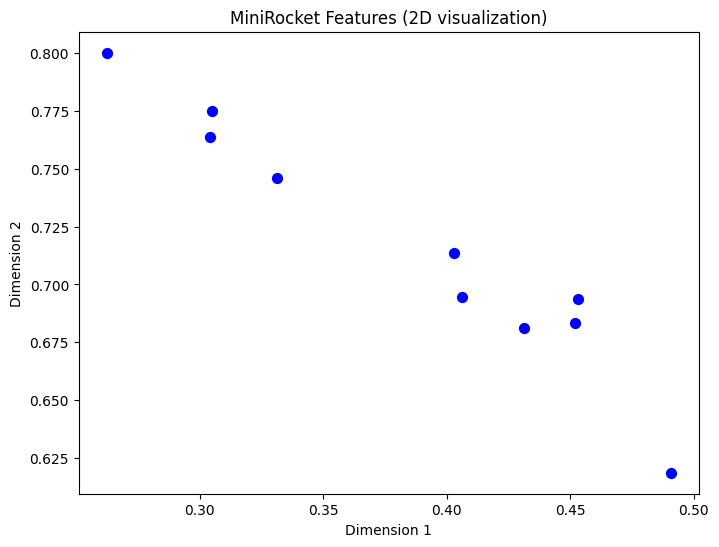

Cluster labels: [0 2 1 0 0 0 1 1 1 0]


In [14]:
import numpy as np
import umap
from sktime.transformations.panel.rocket import MiniRocket
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifierCV
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --------------------------
# Step 1: Generate example variable-length activation arrays
# Each sample has shape (T, 1536) with T varying.
num_samples = 10
original_feature_dim = 1536
series_list = [np.random.randn(np.random.randint(500, 1000), original_feature_dim)
               for _ in range(num_samples)]

# --------------------------
# Step 2: Reduce channel dimension using UMAP
# We reduce from 1536 to a lower dimension (e.g., 64)
all_time_steps = np.vstack(series_list)  # shape: (total_time_steps, 1536)
reduced_dim = 64
umap_reducer = umap.UMAP(n_components=reduced_dim, random_state=42)
umap_reducer.fit(all_time_steps)
# Transform each sample: now each sample has shape (T, 64)
series_list_reduced = [umap_reducer.transform(s) for s in series_list]

# --------------------------
# Step 3: Pad the reduced series to a common length
def pad_series(series_list, pad_value=0.0):
    """Pads each series (shape: [T, F]) along the time axis to the maximum length."""
    max_len = max(s.shape[0] for s in series_list)
    padded_list = []
    for s in series_list:
        T, F = s.shape
        if T < max_len:
            pad_width = ((0, max_len - T), (0, 0))
            s_padded = np.pad(s, pad_width, mode='constant', constant_values=pad_value)
        else:
            s_padded = s
        padded_list.append(s_padded)
    return np.stack(padded_list, axis=0)  # Shape: (n_samples, max_len, F)

X_reduced_padded = pad_series(series_list_reduced)  # shape: (num_samples, max_len, 64)
print("Padded reduced data shape:", X_reduced_padded.shape)

# --------------------------
# Step 4: Prepare data for MiniRocket
# MiniRocket expects data of shape (n_samples, n_channels, series_length)
X_for_rocket = np.transpose(X_reduced_padded, (0, 2, 1))  # Now shape: (num_samples, 64, max_len)
print("Data shape for MiniRocket:", X_for_rocket.shape)

# --------------------------
# Step 5: Apply MiniRocket to extract features
rocket = MiniRocket(random_state=42)
rocket.fit(X_for_rocket)
X_features = rocket.transform(X_for_rocket)  # shape: (num_samples, n_features)
print("MiniRocket feature shape:", X_features.shape)

# --------------------------
# Step 6: (Optional) Visualization of features
# If X_features has fewer than 2 columns, apply PCA for visualization.
# After obtaining the MiniRocket features:
print("MiniRocket feature shape:", X_features.shape)

# Ensure X_features is a NumPy array
if hasattr(X_features, "to_numpy"):
    X_features = X_features.to_numpy()

# For visualization, if there are fewer than 2 columns, apply PCA to obtain 2D embeddings
if X_features.ndim == 1 or X_features.shape[1] < 2:
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2, random_state=42)
    X_vis = pca.fit_transform(X_features)
else:
    X_vis = X_features[:, :2]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c='blue', s=50)
plt.title("MiniRocket Features (2D visualization)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# --------------------------
# Step 7: (Optional) K-means clustering on the features
k = 3  # number of clusters, adjust as needed
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_features)
print("Cluster labels:", clusters)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from hdbscan import HDBSCAN
from scipy.ndimage import center_of_mass

# Parameters
num_layers = 28     # Total number of layers
num_points = 919    # Number of points per layer (from the second dimension)
flatten_dim = 12 * 128  # Each point is a 12x128 matrix flattened to 1536 features

# --------------------------
# 1. Simulate or Load Activations
# --------------------------
# Here we simulate the activations as random tensors.
# In practice, replace these with your actual activation tensors.
layer_activations = attention_activations

# --------------------------
# 2. Process Activations: Flatten and Label
# --------------------------
# For each layer, remove the batch dimension, flatten the [12, 128] activations,
# and assign a label corresponding to the layer index.
data_list = []  # To hold flattened activation vectors from all layers
layer_labels = []  # To store layer indices as labels

for layer_idx, activations in enumerate(layer_activations):
    # Remove the batch dimension: [1, 919, 12, 128] -> [919, 12, 128]
    activation = layer_activations[layer_idx].squeeze(0)
    # Flatten each point: [919, 12, 128] -> [919, 1536]
    activation_flat = activation.reshape(num_points, -1)
    # Convert to float32 if necessary to avoid BFloat16 issues
    activation_flat = activation_flat.to(torch.float32)
    # Convert to NumPy and append to list
    data_list.append(activation_flat.numpy())
    # Create a label for each of the 919 points from this layer
    layer_labels.extend([layer_idx] * num_points)

# Combine data from all layers: shape will be (28*919, 1536)
data_all = np.vstack(data_list)
layer_labels = np.array(layer_labels)

# --------------------------
# 3. Standardize the Data
# --------------------------
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_all)

# --------------------------
# 4. Dimensionality Reduction
# --------------------------
# Optionally reduce dimensions with PCA to denoise and speed up UMAP.
pca = PCA(n_components=50)
data_pca = pca.fit_transform(data_scaled)

# Also create a direct PCA reduction to 2D for visualization
pca_2d = PCA(n_components=2)
pca_embedding = pca_2d.fit_transform(data_scaled)

# Use UMAP to further reduce to 2D for visualization.
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
embedding = umap_reducer.fit_transform(data_pca)

# --------------------------
# 5. Unsupervised Clustering with Evaluation
# --------------------------
# Set the number of clusters to the number of layers
n_clusters = num_layers  # Using 28 clusters to match the 28 layers

# Perform KMeans clustering with the number of clusters equal to number of layers
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

# Calculate evaluation metrics
ari = adjusted_rand_score(layer_labels, kmeans_labels)
ami = adjusted_mutual_info_score(layer_labels, kmeans_labels)
silhouette = silhouette_score(data_pca, kmeans_labels)

print(f"KMeans Clustering Evaluation (n_clusters={n_clusters}):")
print("-" * 60)
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print("-" * 40)

# --------------------------
# 6. Evaluate UMAP's clustering ability
# --------------------------
print("\nEvaluating UMAP's clustering ability:")
print("-" * 60)

# KMeans on UMAP embedding with number of clusters equal to number of layers
umap_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
umap_kmeans_labels = umap_kmeans.fit_predict(embedding)

# DBSCAN on UMAP embedding (density-based clustering)
umap_dbscan = DBSCAN(eps=0.5, min_samples=10)
umap_dbscan_labels = umap_dbscan.fit_predict(embedding)

# HDBSCAN on UMAP embedding (hierarchical density-based clustering)
try:
    umap_hdbscan = HDBSCAN(min_cluster_size=50, min_samples=10)
    umap_hdbscan_labels = umap_hdbscan.fit_predict(embedding)
    hdbscan_available = True
except:
    print("HDBSCAN not available, skipping this clustering method")
    hdbscan_available = False

# Evaluate each clustering method
print("KMeans on UMAP embedding:")
umap_kmeans_ari = adjusted_rand_score(layer_labels, umap_kmeans_labels)
umap_kmeans_ami = adjusted_mutual_info_score(layer_labels, umap_kmeans_labels)
umap_kmeans_silhouette = silhouette_score(embedding, umap_kmeans_labels)
print(f"Adjusted Rand Index: {umap_kmeans_ari:.4f}")
print(f"Adjusted Mutual Information: {umap_kmeans_ami:.4f}")
print(f"Silhouette Score: {umap_kmeans_silhouette:.4f}")
print("-" * 40)

# Only evaluate DBSCAN if it found more than one cluster
n_dbscan_clusters = len(np.unique(umap_dbscan_labels[umap_dbscan_labels >= 0]))
print(f"DBSCAN on UMAP embedding (found {n_dbscan_clusters} clusters, {np.sum(umap_dbscan_labels == -1)} noise points):")
if n_dbscan_clusters > 1:
    # Filter out noise points for evaluation
    non_noise_mask = umap_dbscan_labels != -1
    if np.sum(non_noise_mask) > 1:
        umap_dbscan_ari = adjusted_rand_score(layer_labels[non_noise_mask], umap_dbscan_labels[non_noise_mask])
        umap_dbscan_ami = adjusted_mutual_info_score(layer_labels[non_noise_mask], umap_dbscan_labels[non_noise_mask])
        umap_dbscan_silhouette = silhouette_score(embedding[non_noise_mask], umap_dbscan_labels[non_noise_mask]) if np.sum(non_noise_mask) > 1 else 0
        print(f"Adjusted Rand Index: {umap_dbscan_ari:.4f}")
        print(f"Adjusted Mutual Information: {umap_dbscan_ami:.4f}")
        print(f"Silhouette Score: {umap_dbscan_silhouette:.4f}")
    else:
        print("Too few non-noise points for evaluation")
else:
    print("DBSCAN found only one cluster or only noise points, metrics not applicable")
print("-" * 40)

# Evaluate HDBSCAN if available
if hdbscan_available:
    n_hdbscan_clusters = len(np.unique(umap_hdbscan_labels[umap_hdbscan_labels >= 0]))
    print(f"HDBSCAN on UMAP embedding (found {n_hdbscan_clusters} clusters, {np.sum(umap_hdbscan_labels == -1)} noise points):")
    if n_hdbscan_clusters > 1:
        # Filter out noise points for evaluation
        non_noise_mask = umap_hdbscan_labels != -1
        if np.sum(non_noise_mask) > 1:
            umap_hdbscan_ari = adjusted_rand_score(layer_labels[non_noise_mask], umap_hdbscan_labels[non_noise_mask])
            umap_hdbscan_ami = adjusted_mutual_info_score(layer_labels[non_noise_mask], umap_hdbscan_labels[non_noise_mask])
            umap_hdbscan_silhouette = silhouette_score(embedding[non_noise_mask], umap_hdbscan_labels[non_noise_mask]) if np.sum(non_noise_mask) > 1 else 0
            print(f"Adjusted Rand Index: {umap_hdbscan_ari:.4f}")
            print(f"Adjusted Mutual Information: {umap_hdbscan_ami:.4f}")
            print(f"Silhouette Score: {umap_hdbscan_silhouette:.4f}")
        else:
            print("Too few non-noise points for evaluation")
    else:
        print("HDBSCAN found only one cluster or only noise points, metrics not applicable")
    print("-" * 40)

# Helper function to find cluster centers
def find_cluster_centers(data, labels):
    unique_labels = np.unique(labels)
    centers = {}
    for label in unique_labels:
        if label != -1:  # Skip noise points
            mask = labels == label
            points = data[mask]
            center_x, center_y = np.mean(points[:, 0]), np.mean(points[:, 1])
            centers[label] = (center_x, center_y)
    return centers

# --------------------------
# 7. Visualization
# --------------------------
# Plot the UMAP projection with points colored by their layer label.
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                      c=layer_labels, cmap='tab20', s=10)
plt.title('UMAP Projection of Activations by Layer')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(scatter, label='Layer Index')

# Add layer indices as text labels
layer_centers = find_cluster_centers(embedding, layer_labels)
for layer, (x, y) in layer_centers.items():
    plt.text(x, y, str(layer), fontsize=9, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

# Plot the UMAP projection colored by KMeans cluster assignments (on PCA data).
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                      c=kmeans_labels, cmap='tab20', s=10)
plt.title(f'UMAP Projection with KMeans Clusters on PCA data (n={n_clusters})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(scatter, label='KMeans Cluster')

# Add cluster indices as text labels
kmeans_centers = find_cluster_centers(embedding, kmeans_labels)
for cluster, (x, y) in kmeans_centers.items():
    plt.text(x, y, str(cluster), fontsize=9, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

# Plot the UMAP projection colored by KMeans cluster assignments (on UMAP data).
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                      c=umap_kmeans_labels, cmap='tab20', s=10)
plt.title(f'UMAP Projection with KMeans Clusters on UMAP data (n={n_clusters})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(scatter, label='KMeans Cluster')

# Add cluster indices as text labels
umap_kmeans_centers = find_cluster_centers(embedding, umap_kmeans_labels)
for cluster, (x, y) in umap_kmeans_centers.items():
    plt.text(x, y, str(cluster), fontsize=9, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

# Plot the UMAP projection colored by DBSCAN cluster assignments.
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                      c=umap_dbscan_labels, cmap='tab20', s=10)
plt.title('UMAP Projection with DBSCAN Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(scatter, label='DBSCAN Cluster')

# Add cluster indices as text labels
dbscan_centers = find_cluster_centers(embedding, umap_dbscan_labels)
for cluster, (x, y) in dbscan_centers.items():
    plt.text(x, y, str(cluster), fontsize=9, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

# Plot the direct PCA projection with points colored by their layer label
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1],
                      c=layer_labels, cmap='tab20', s=10)
plt.title('PCA Projection of Activations by Layer')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(scatter, label='Layer Index')

# Add layer indices as text labels
pca_layer_centers = find_cluster_centers(pca_embedding, layer_labels)
for layer, (x, y) in pca_layer_centers.items():
    plt.text(x, y, str(layer), fontsize=9, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from hdbscan import HDBSCAN
from scipy.ndimage import center_of_mass

# Parameters
num_layers = 28     # Total number of layers
num_heads = 12      # Number of attention heads per layer
num_points = 919    # Number of points per layer (from the second dimension)
head_dim = 128      # Dimension of each head

# --------------------------
# 1. Load Activations
# --------------------------
layer_activations = attention_activations

# --------------------------
# 2. Process Activations: Organize by Head and Label
# --------------------------
# For each layer and head, extract the activations and assign a label
data_list = []  # To hold activation vectors for each head across all layers
head_labels = []  # To store head indices as labels (0-11)
layer_head_labels = []  # To store combined layer-head labels for reference

for layer_idx, activations in enumerate(layer_activations):
    # Remove the batch dimension: [1, 919, 12, 128] -> [919, 12, 128]
    activation = layer_activations[layer_idx].squeeze(0)
    
    # For each head in this layer
    for head_idx in range(num_heads):
        # Extract this head's activations: [919, 128]
        head_activation = activation[:, head_idx, :]
        
        # Convert to float32 if necessary to avoid BFloat16 issues
        head_activation = head_activation.to(torch.float32)
        
        # Convert to NumPy and append to list
        data_list.append(head_activation.numpy())
        
        # Create a label for each point from this head (0-11)
        head_labels.extend([head_idx] * num_points)
        
        # Also create a combined layer-head label for reference
        layer_head_labels.extend([f"{layer_idx}-{head_idx}"] * num_points)

# Combine data from all heads across all layers: shape will be (28*12*919, 128)
data_all = np.vstack(data_list)
head_labels = np.array(head_labels)
layer_head_labels = np.array(layer_head_labels)

# --------------------------
# 3. Standardize the Data
# --------------------------
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_all)

# --------------------------
# 4. Dimensionality Reduction
# --------------------------
# Optionally reduce dimensions with PCA to denoise and speed up UMAP
pca = PCA(n_components=50)
data_pca = pca.fit_transform(data_scaled)

# Also create a direct PCA reduction to 2D for visualization
pca_2d = PCA(n_components=2)
pca_embedding = pca_2d.fit_transform(data_scaled)

# Use UMAP to further reduce to 2D for visualization
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
embedding = umap_reducer.fit_transform(data_pca)

# --------------------------
# 5. Unsupervised Clustering with Evaluation
# --------------------------
# Set the number of clusters to the number of heads
n_clusters = num_heads  # Using 12 clusters to match the 12 heads

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

# Calculate evaluation metrics
ari = adjusted_rand_score(head_labels, kmeans_labels)
ami = adjusted_mutual_info_score(head_labels, kmeans_labels)
silhouette = silhouette_score(data_pca, kmeans_labels)

print(f"KMeans Clustering Evaluation (n_clusters={n_clusters}):")
print("-" * 60)
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print("-" * 40)

# --------------------------
# 6. Evaluate UMAP's clustering ability
# --------------------------
print("\nEvaluating UMAP's clustering ability:")
print("-" * 60)

# KMeans on UMAP embedding
umap_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
umap_kmeans_labels = umap_kmeans.fit_predict(embedding)

# DBSCAN on UMAP embedding (density-based clustering)
umap_dbscan = DBSCAN(eps=0.5, min_samples=10)
umap_dbscan_labels = umap_dbscan.fit_predict(embedding)

# HDBSCAN on UMAP embedding (hierarchical density-based clustering)
try:
    umap_hdbscan = HDBSCAN(min_cluster_size=50, min_samples=10)
    umap_hdbscan_labels = umap_hdbscan.fit_predict(embedding)
    hdbscan_available = True
except:
    print("HDBSCAN not available, skipping this clustering method")
    hdbscan_available = False

# Evaluate each clustering method
print("KMeans on UMAP embedding:")
umap_kmeans_ari = adjusted_rand_score(head_labels, umap_kmeans_labels)
umap_kmeans_ami = adjusted_mutual_info_score(head_labels, umap_kmeans_labels)
umap_kmeans_silhouette = silhouette_score(embedding, umap_kmeans_labels)
print(f"Adjusted Rand Index: {umap_kmeans_ari:.4f}")
print(f"Adjusted Mutual Information: {umap_kmeans_ami:.4f}")
print(f"Silhouette Score: {umap_kmeans_silhouette:.4f}")
print("-" * 40)

# Only evaluate DBSCAN if it found more than one cluster
n_dbscan_clusters = len(np.unique(umap_dbscan_labels[umap_dbscan_labels >= 0]))
print(f"DBSCAN on UMAP embedding (found {n_dbscan_clusters} clusters, {np.sum(umap_dbscan_labels == -1)} noise points):")
if n_dbscan_clusters > 1:
    # Filter out noise points for evaluation
    non_noise_mask = umap_dbscan_labels != -1
    if np.sum(non_noise_mask) > 1:
        umap_dbscan_ari = adjusted_rand_score(head_labels[non_noise_mask], umap_dbscan_labels[non_noise_mask])
        umap_dbscan_ami = adjusted_mutual_info_score(head_labels[non_noise_mask], umap_dbscan_labels[non_noise_mask])
        umap_dbscan_silhouette = silhouette_score(embedding[non_noise_mask], umap_dbscan_labels[non_noise_mask]) if np.sum(non_noise_mask) > 1 else 0
        print(f"Adjusted Rand Index: {umap_dbscan_ari:.4f}")
        print(f"Adjusted Mutual Information: {umap_dbscan_ami:.4f}")
        print(f"Silhouette Score: {umap_dbscan_silhouette:.4f}")
    else:
        print("Too few non-noise points for evaluation")
else:
    print("DBSCAN found only one cluster or only noise points, metrics not applicable")
print("-" * 40)

# Evaluate HDBSCAN if available
if hdbscan_available:
    n_hdbscan_clusters = len(np.unique(umap_hdbscan_labels[umap_hdbscan_labels >= 0]))
    print(f"HDBSCAN on UMAP embedding (found {n_hdbscan_clusters} clusters, {np.sum(umap_hdbscan_labels == -1)} noise points):")
    if n_hdbscan_clusters > 1:
        # Filter out noise points for evaluation
        non_noise_mask = umap_hdbscan_labels != -1
        if np.sum(non_noise_mask) > 1:
            umap_hdbscan_ari = adjusted_rand_score(head_labels[non_noise_mask], umap_hdbscan_labels[non_noise_mask])
            umap_hdbscan_ami = adjusted_mutual_info_score(head_labels[non_noise_mask], umap_hdbscan_labels[non_noise_mask])
            umap_hdbscan_silhouette = silhouette_score(embedding[non_noise_mask], umap_hdbscan_labels[non_noise_mask]) if np.sum(non_noise_mask) > 1 else 0
            print(f"Adjusted Rand Index: {umap_hdbscan_ari:.4f}")
            print(f"Adjusted Mutual Information: {umap_hdbscan_ami:.4f}")
            print(f"Silhouette Score: {umap_hdbscan_silhouette:.4f}")
        else:
            print("Too few non-noise points for evaluation")
    else:
        print("HDBSCAN found only one cluster or only noise points, metrics not applicable")
    print("-" * 40)

# Helper function to find cluster centers
def find_cluster_centers(data, labels):
    unique_labels = np.unique(labels)
    centers = {}
    for label in unique_labels:
        if label != -1:  # Skip noise points
            mask = labels == label
            points = data[mask]
            center_x, center_y = np.mean(points[:, 0]), np.mean(points[:, 1])
            centers[label] = (center_x, center_y)
    return centers

# --------------------------
# 7. Visualization
# --------------------------
# Plot the UMAP projection with points colored by their head label
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                      c=head_labels, cmap='tab20', s=10)
plt.title('UMAP Projection of Activations by Head')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(scatter, label='Head Index')

# Add head indices as text labels
head_centers = find_cluster_centers(embedding, head_labels)
for head, (x, y) in head_centers.items():
    plt.text(x, y, str(head), fontsize=9, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

# Plot the UMAP projection colored by KMeans cluster assignments (on PCA data)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                      c=kmeans_labels, cmap='tab20', s=10)
plt.title(f'UMAP Projection with KMeans Clusters on PCA data (n={n_clusters})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(scatter, label='KMeans Cluster')

# Add cluster indices as text labels
kmeans_centers = find_cluster_centers(embedding, kmeans_labels)
for cluster, (x, y) in kmeans_centers.items():
    plt.text(x, y, str(cluster), fontsize=9, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

# Plot the UMAP projection colored by KMeans cluster assignments (on UMAP data)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                      c=umap_kmeans_labels, cmap='tab20', s=10)
plt.title(f'UMAP Projection with KMeans Clusters on UMAP data (n={n_clusters})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(scatter, label='KMeans Cluster')

# Add cluster indices as text labels
umap_kmeans_centers = find_cluster_centers(embedding, umap_kmeans_labels)
for cluster, (x, y) in umap_kmeans_centers.items():
    plt.text(x, y, str(cluster), fontsize=9, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

# Plot the UMAP projection colored by DBSCAN cluster assignments
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                      c=umap_dbscan_labels, cmap='tab20', s=10)
plt.title('UMAP Projection with DBSCAN Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(scatter, label='DBSCAN Cluster')

# Add cluster indices as text labels
dbscan_centers = find_cluster_centers(embedding, umap_dbscan_labels)
for cluster, (x, y) in dbscan_centers.items():
    plt.text(x, y, str(cluster), fontsize=9, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

# Plot the direct PCA projection with points colored by their head label
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1],
                      c=head_labels, cmap='tab20', s=10)
plt.title('PCA Projection of Activations by Head')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(scatter, label='Head Index')

# Add head indices as text labels
pca_head_centers = find_cluster_centers(pca_embedding, head_labels)
for head, (x, y) in pca_head_centers.items():
    plt.text(x, y, str(head), fontsize=9, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()